In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_2D_weighted_Run3_MCC8_/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_weighted_V4_improved_2D.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Cross section for single differnetial in Momentum (no sys)

In [4]:
# Load input files
#inputdir = '/home/thomasm/numuCC/V33/10kevents/'
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_2D_Run3_wighted_MCC8_.root","RECREATE");

#filename_overlay = 'NuCCana_Overlay_V18_V4.root'
#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
filename_data = 'NuCCana_data_fullRun3.root'
filename_ext = 'NuCCana_ext_V25_G1.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
#pot_data =    9.457e+18  # best with tor875
#data_trigger = 2278230.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  85768579.0  #2120135 #5685315 # EXT

pot_data =     2.144e+20  # best with tor875
data_trigger = 51546294.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	784254
Ext: Number of Entries:		1018743
Dirt: Number of Entries:	40808

POT: 
Data:		2.144e+20
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.26535223192e+20

Scalefactors: 
Data:		1.0
Ext:		0.600992748172
Overlay:	0.169069492301
Dirt:		1.69438986704


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4_noflux.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	784253
Ext: Number of Entries:		1018742
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 1.58205e+11  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')

energy_cut = ' && MCle_Energy>0.15'

numu_signal = numu_signal+energy_cut
numu_true = numu_true+energy_cut
numu_nomu = numu_nomu+energy_cut
numu_lowpur = numu_lowpur+energy_cut
numu_nc = numu_nc+energy_cut
numu_ov = numu_ov+energy_cut
numu_other = numu_other+energy_cut
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:

track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained_tmp = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'
track_end_uncontained = '(1)'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && ('+track_end_uncontained_tmp+'==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [13]:
# calculate total flux integrated cross section:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries('numu_true')*scale_out[overlay_out]

print N_overlay

h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
globale.dirt_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()

overlay_out.Draw(weight_name+'>>h_weight_func',numu_true,'0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()

print overlay_pass_weight

N_dirt = N_dirt*dirt_pass_weight
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight
eff = N_signal/N_true

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Efficiency: ',eff
print 'Total integrated cross section:', sigma_tot

sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC

5031.67716038
1.11387751556
Number of data: 38351
Number of ext: 4092.76061505
Number of dirt: 890.388325703
Number of overlay: 5604.6720545
Number of overlay signal: 27280.4952368
Efficiency:  0.556227829903
Total integrated cross section: 7.68884325033e-39
Total integrated cross section for MC: 7.55516692203e-39


In [14]:
print data_out.GetEntries(cut+' && NuPDG!=14')

print 'tot passing events: ', overlay_out.GetEntries(cut)
print 'Tot passing events reco as nue ',overlay_out.GetEntries(cut+' && NuPDG!=14')
print 'Tot passing events reco as nue and true nue',overlay_out.GetEntries(cut+' && MCNu_PDG==12')
print 'Tot passing events reco as nue and true muon',overlay_out.GetEntries(cut+' && NuPDG!=14 && MCNu_PDG==14')

38351
tot passing events:  166643
Tot passing events reco as nue  5704
Tot passing events reco as nue and true nue 396
Tot passing events reco as nue and true muon 5494


In [15]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    print len_mom[i]
    sum_bins+=len_mom[i]

#print len_mom
#print sum(len_mom), sum_bins

num_entries = 20000000

5
5
5
4
4
4
5
5
5


In [16]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/25.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/25.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/20.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [17]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [18]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'

h_1d_sel = []
h_1d_gen = []
h_1d_eff = []

num_sel = np.zeros(sum_bins+1)
num_gen = np.zeros(sum_bins+1)
num_eff = np.zeros(sum_bins+1)

for t_bin in range(len_theta):
    h_1d_sel.append(ROOT.TH1F('h_1d_sel['+str(t_bin)+']',"true momentum, selected",len_mom[t_bin],array('f',mom_bins[t_bin])))
    h_1d_gen.append( ROOT.TH1F('h_1d_gen['+str(t_bin)+']',"true momentum, generated",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_1d_eff.append( ROOT.TH1F('h_1d_eff['+str(t_bin)+']',"true efficiency",len_mom[t_bin],array('f',mom_bins[t_bin])) )

bin_counter = 0
for t_bin in range(len_theta):
    this_cut = ' && cos(MCNu_leptonTheta)>'+str(theta_bins[t_bin])+' && cos(MCNu_leptonTheta)<'+str(theta_bins[t_bin+1])
    print this_cut
    globale.overlay_out.Draw('MCle_Energy>>h_1d_sel['+str(t_bin)+']',weight_name+'*('+zahler_cut+this_cut+')','',num_entries)
    globale.overlay_out.Draw('MCle_Energy>>h_1d_gen['+str(t_bin)+']',weight_name+'*('+nenner_cut+this_cut+')','',num_entries)
    h_1d_eff[t_bin] = h_1d_sel[t_bin].Clone()
    h_1d_eff[t_bin].Divide(h_1d_gen[t_bin])
    for m_bin in range(len_mom[t_bin]):
        num_sel[bin_counter] = h_1d_sel[t_bin].GetBinContent(m_bin+1)
        num_gen[bin_counter] = h_1d_gen[t_bin].GetBinContent(m_bin+1)
        num_eff[bin_counter] = h_1d_eff[t_bin].GetBinContent(m_bin+1)
        bin_counter+=1
    num_sel[sum_bins] += h_1d_sel[t_bin].GetBinContent(len_mom[t_bin]+1)
    num_gen[sum_bins] += h_1d_gen[t_bin].GetBinContent(len_mom[t_bin]+1)
    num_eff[sum_bins] += h_1d_eff[t_bin].GetBinContent(len_mom[t_bin]+1)
    h_1d_sel[t_bin].Write('h_1d_sel['+str(t_bin)+']')
    h_1d_gen[t_bin].Write('h_1d_gen['+str(t_bin)+']')
    h_1d_eff[t_bin].Write('h_1d_eff['+str(t_bin)+']')



 && cos(MCNu_leptonTheta)>-1.0 && cos(MCNu_leptonTheta)<-0.5
 && cos(MCNu_leptonTheta)>-0.5 && cos(MCNu_leptonTheta)<0.0
 && cos(MCNu_leptonTheta)>0.0 && cos(MCNu_leptonTheta)<0.28
 && cos(MCNu_leptonTheta)>0.28 && cos(MCNu_leptonTheta)<0.47
 && cos(MCNu_leptonTheta)>0.47 && cos(MCNu_leptonTheta)<0.63
 && cos(MCNu_leptonTheta)>0.63 && cos(MCNu_leptonTheta)<0.765
 && cos(MCNu_leptonTheta)>0.765 && cos(MCNu_leptonTheta)<0.865
 && cos(MCNu_leptonTheta)>0.865 && cos(MCNu_leptonTheta)<0.935
 && cos(MCNu_leptonTheta)>0.935 && cos(MCNu_leptonTheta)<1.0


In [19]:
# generate smearing matrix
num_entries = 20000000
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
bin_counter_true = 0
run = 1
if run==0:
    true_reco_matrix = np.load(outputdir+'true_reco_matrix_run3.npy')

if run:
    true_reco_matrix = np.zeros((sum_bins+1,sum_bins+1))
    for t_bin in range(len_theta):
        print 'next theta',t_bin
        #bin_counter_true+=1
        for m_bin in range(len_mom[t_bin]):
            bin_counter_reco = 0
            # define the true bins borders
            #plot for each true bin in mom and theta the distribution in reco for mom and theta, 42 times 42 bins
            mom_min = mom_bins[t_bin][m_bin]
            mom_max = mom_bins[t_bin][m_bin+1]
            theta_min = theta_bins[t_bin]
            theta_max = theta_bins[t_bin+1]
            #print mom_min, mom_max, theta_min, theta_max
            this_cut = ' && MCle_Energy>'+str(mom_min)+' && MCle_Energy<'+str(mom_max)+' && cos(MCNu_leptonTheta)>'+str(theta_min)+' && cos(MCNu_leptonTheta)<'+str(theta_max)
            for t2_bin in range(len_theta):
                #print 'new theta'
                #print len_mom[t2_bin], mom_bins[t2_bin]
                h_temp = ROOT.TH2F("h_temp",'h_temp',len_mom[t2_bin],array('f',mom_bins[t2_bin]),len_theta,array('f',theta_bins))
                h_temp_r = ROOT.TH2F("h_temp_r",'h_temp_r',len_mom[t2_bin],array('f',mom_bins[t2_bin]),len_theta,array('f',theta_bins))
                globale.overlay_out.Draw('cos(TrackTheta):TrackMomMCS_mom'+'>>h_temp',weight_name+'*('+cut+this_cut+'&& numu_signal && track_end_uncontained)','',num_entries)
                globale.overlay_out.Draw('cos(TrackTheta):TrackMomRange_mu'+'>>h_temp_r',weight_name+'*('+cut+this_cut+'&& numu_signal && !track_end_uncontained)','',num_entries)
                h_temp.Add(h_temp_r)
                #print h_temp.GetBinContent(1,1)
                #h_temp.Draw()
                #c1.Draw()
                for m2_bin in range(len_mom[t2_bin]):
                    #print bin_counter_true,bin_counter_reco
                    true_reco_matrix[bin_counter_true,bin_counter_reco] = h_temp.GetBinContent(m2_bin+1,t2_bin+1)
                    #print bin_counter_true,bin_counter_reco, true_reco_matrix[bin_counter_true,bin_counter_reco]
                    bin_counter_reco+=1
                true_reco_matrix[bin_counter_true,bin_counter_reco] += h_temp.GetBinContent(len_mom[t2_bin]+1,t2_bin+1)
                #raw_input("Press Enter to continue...")
                del h_temp
                del h_temp_r
                #bin_counter_reco+=1
            bin_counter_true+=1

    # fill true overflow bin
    bin_counter_reco = 0
    this_cut = ' && MCle_Energy>2.5'
    for t2_bin in range(len_theta):
        #print 'new theta'
        #print len_mom[t2_bin], mom_bins[t2_bin]
        h_temp = ROOT.TH2F("h_temp",'h_temp',len_mom[t2_bin],array('f',mom_bins[t2_bin]),len_theta,array('f',theta_bins))
        h_temp_r = ROOT.TH2F("h_temp_r",'h_temp_r',len_mom[t2_bin],array('f',mom_bins[t2_bin]),len_theta,array('f',theta_bins))
        globale.overlay_out.Draw('cos(TrackTheta):TrackMomMCS_mom'+'>>h_temp',weight_name+'*('+cut+this_cut+'&& numu_signal && track_end_uncontained)','',num_entries)
        globale.overlay_out.Draw('cos(TrackTheta):TrackMomRange_mu'+'>>h_temp_r',weight_name+'*('+cut+this_cut+'&& numu_signal && !track_end_uncontained)','',num_entries)
        h_temp.Add(h_temp_r)
        for m2_bin in range(len_mom[t2_bin]):
            #print bin_counter_true,bin_counter_reco
            true_reco_matrix[sum_bins,bin_counter_reco] = h_temp.GetBinContent(m2_bin+1,t2_bin+1)
            #print bin_counter_true,bin_counter_reco, true_reco_matrix[bin_counter_true,bin_counter_reco]
            bin_counter_reco+=1
        true_reco_matrix[sum_bins,bin_counter_reco] += h_temp.GetBinContent(len_mom[t2_bin]+1,t2_bin+1)
        #raw_input("Press Enter to continue...")
        del h_temp
        del h_temp_r


next theta 0
next theta 1
next theta 2
next theta 3
next theta 4
next theta 5
next theta 6
next theta 7
next theta 8


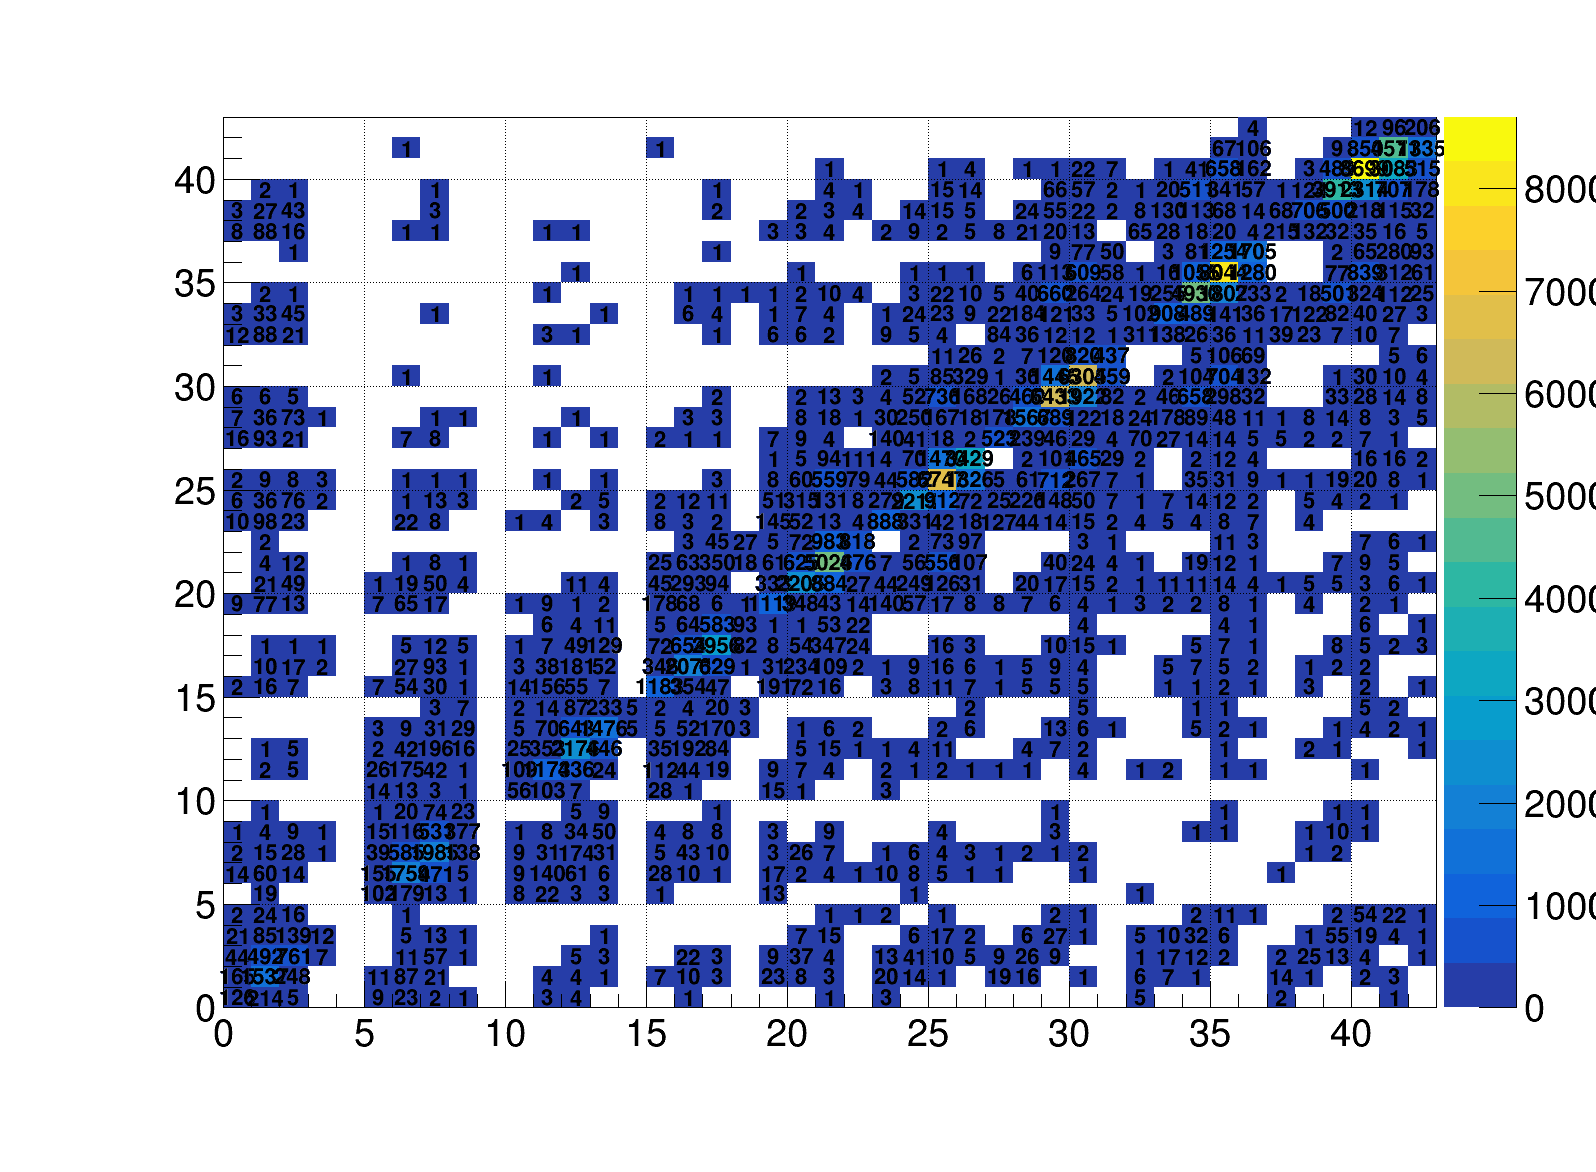

In [20]:
h_true_reco = ROOT.TH2F("h_true_reco",'Migration matrix',sum_bins+1,0,sum_bins+1,sum_bins+1,0,sum_bins+1)
for i in range(sum_bins+1):
    for j in range(sum_bins+1):
        h_true_reco.SetBinContent(i+1,j+1, true_reco_matrix[i,j])
h_true_reco.Draw('colz text')
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat("0.0f");

c1.Draw()

In [21]:
h_true_reco.Write('h_true_reco')
if run:
    np.save(outputdir+'true_reco_matrix_run3',true_reco_matrix)

In [22]:
smearing_matrix = np.zeros((sum_bins+1,sum_bins+1))
sum_reco = true_reco_matrix.sum(axis=1)
#print sum_reco
smearing_matrix = true_reco_matrix / (sum_reco[:,None] + 1e-80)
print smearing_matrix[9,:]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


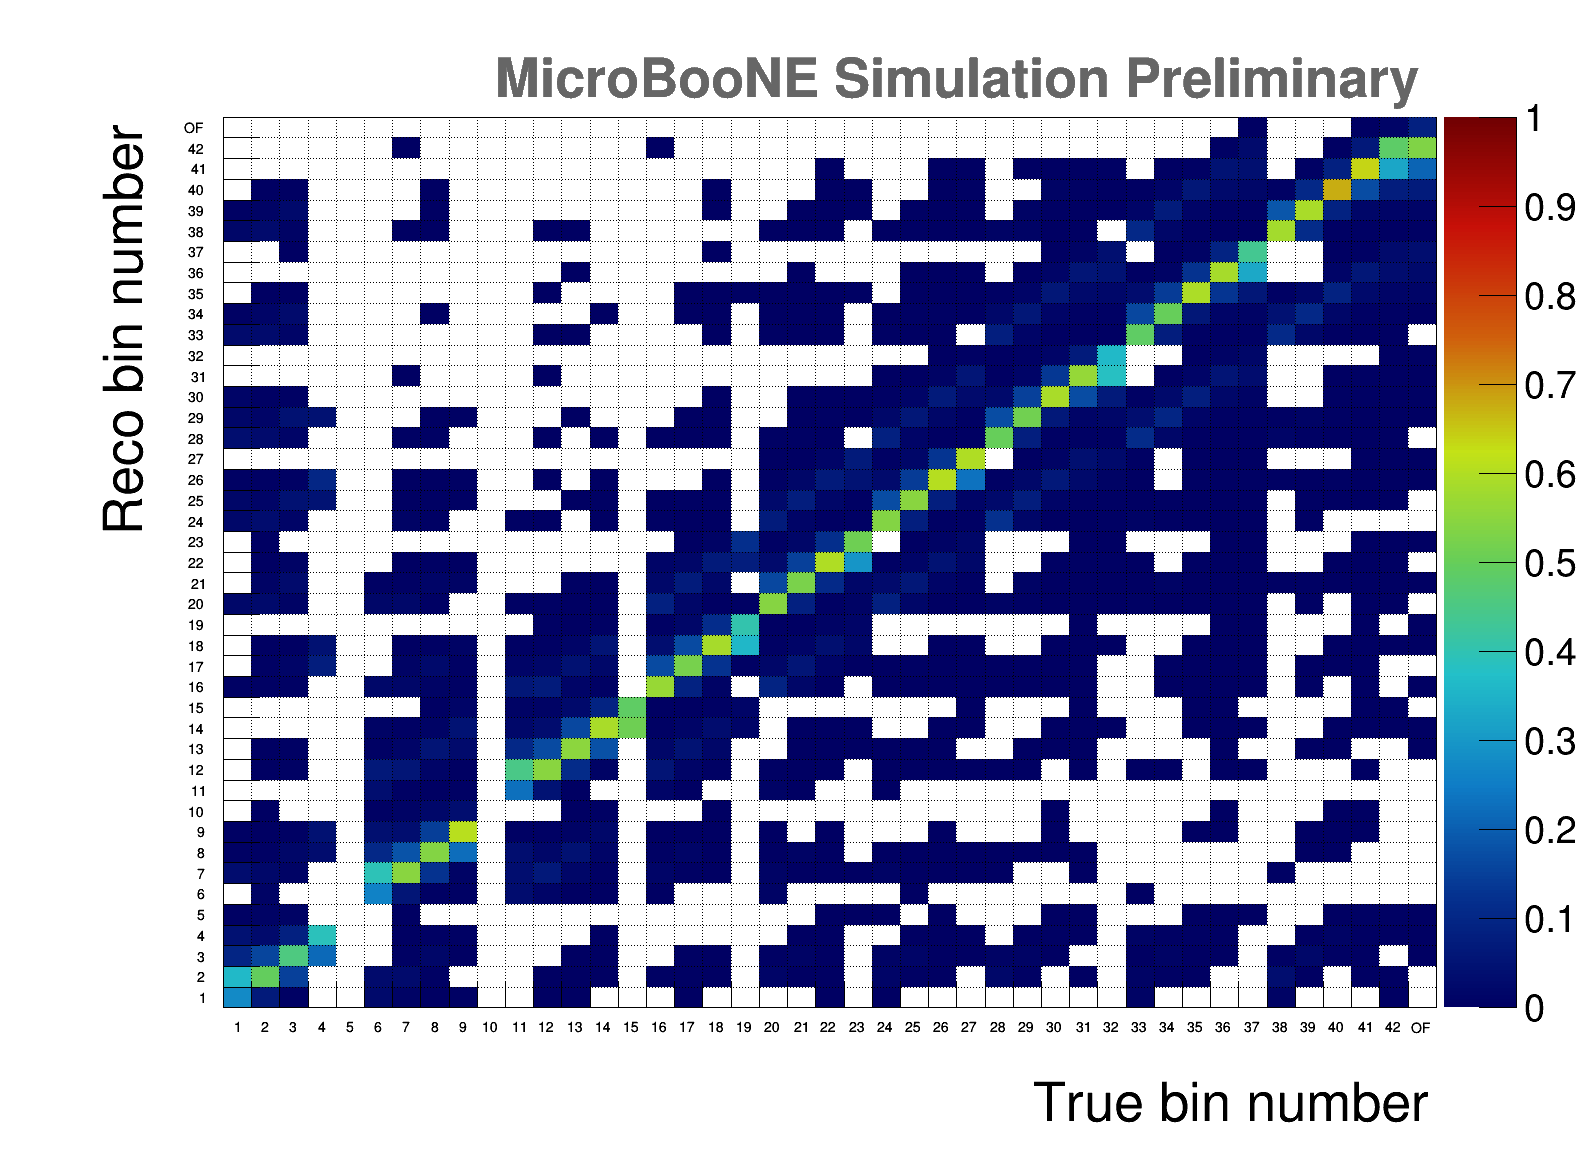

In [23]:
h_smearing = ROOT.TH2F("h_smearing",'smearing matrix',sum_bins+1,0,sum_bins+1,sum_bins+1,0,sum_bins+1)
for i in range(sum_bins+1):
    for j in range(sum_bins+1):
        h_smearing.SetBinContent(i+1,j+1, smearing_matrix[i,j])

ROOT.gStyle.SetPaintTextFormat("0.1f");
ROOT.gStyle.SetPalette(55);
h_smearing.SetContour(500);
h_smearing.SetMaximum(1.0)
#c1.SetFrameFillColor(ROOT.TColor.GetColorPalette(0));
for i in range(1,sum_bins+1):
    h_smearing.GetXaxis().SetBinLabel(i, str(i))
    h_smearing.GetYaxis().SetBinLabel(i, str(i))
h_smearing.GetXaxis().SetBinLabel(43, 'OF')
h_smearing.GetYaxis().SetBinLabel(43, 'OF')

h_smearing.SetXTitle("True bin number")
h_smearing.SetYTitle("Reco bin number")
h_smearing.GetYaxis().SetTitleSize(0.05)
h_smearing.GetYaxis().SetTitleOffset(0.0)
h_smearing.GetYaxis().SetLabelSize(0.02)
h_smearing.GetXaxis().SetTitleSize(0.05)
h_smearing.GetXaxis().SetLabelSize(0.02)
h_smearing.GetXaxis().SetTitleOffset(1)

h_smearing.Draw('colz')
prelim = draw_sim()
prelim.Draw()
#c1.SetFrameFillColor(1);
#ROOT.gStyle.CreateColorGradientTable()

h_smearing.Write('h_smearing')

c1.SetRightMargin(0.1)
c1.Draw()

In [24]:
'''# calculate smeared efficiency tilde
eff_tilde = smearing_matrix.dot(num_sel)/(smearing_matrix.dot(num_gen)+1e-80)
h_1d_eff_tilde = []
for t_bin in range(len_theta):
    h_1d_eff_tilde.append( ROOT.TH1F('h_1d_eff_tilde['+str(t_bin)+']',"reco efficiency",len_mom[t_bin],array('f',mom_bins[t_bin])) )
bin_counter = 0
for t_bin in range(len_theta):
    for m_bin in range(len_mom[t_bin]):
        h_1d_eff_tilde[t_bin].SetBinContent(m_bin+1,eff_tilde[bin_counter])
        h_1d_eff_tilde[t_bin].SetBinError(m_bin+1,0)
        bin_counter += 1
    h_1d_eff_tilde[t_bin].Write('h_1d_eff_tilde['+str(t_bin)+']')'''

'# calculate smeared efficiency tilde\neff_tilde = smearing_matrix.dot(num_sel)/(smearing_matrix.dot(num_gen)+1e-80)\nh_1d_eff_tilde = []\nfor t_bin in range(len_theta):\n    h_1d_eff_tilde.append( ROOT.TH1F(\'h_1d_eff_tilde[\'+str(t_bin)+\']\',"reco efficiency",len_mom[t_bin],array(\'f\',mom_bins[t_bin])) )\nbin_counter = 0\nfor t_bin in range(len_theta):\n    for m_bin in range(len_mom[t_bin]):\n        h_1d_eff_tilde[t_bin].SetBinContent(m_bin+1,eff_tilde[bin_counter])\n        h_1d_eff_tilde[t_bin].SetBinError(m_bin+1,0)\n        bin_counter += 1\n    h_1d_eff_tilde[t_bin].Write(\'h_1d_eff_tilde[\'+str(t_bin)+\']\')'

In [25]:
# calculate smeared efficiency tilde
smearing_matrix = smearing_matrix.T
eff_tilde = smearing_matrix.dot(num_sel)/(smearing_matrix.dot(num_gen)+1e-80)
h_1d_eff_tilde = []
for t_bin in range(len_theta):
    h_1d_eff_tilde.append( ROOT.TH1F('h_1d_eff_tilde['+str(t_bin)+']',"reco efficiency",len_mom[t_bin],array('f',mom_bins[t_bin])) )
bin_counter = 0
for t_bin in range(len_theta):
    for m_bin in range(len_mom[t_bin]):
        h_1d_eff_tilde[t_bin].SetBinContent(m_bin+1,eff_tilde[bin_counter])
        h_1d_eff_tilde[t_bin].SetBinError(m_bin+1,0)
        bin_counter += 1
    h_1d_eff_tilde[t_bin].Write('h_1d_eff_tilde['+str(t_bin)+']')

In [26]:
x_theta = 8
h_1d_eff_tilde[x_theta].SetLineColor(2)
h_1d_eff_tilde[x_theta].Draw()
h_1d_eff[x_theta].Draw('same')
h_1d_eff_tilde[x_theta].SetMaximum(1)
#c1.Draw()
print h_1d_eff_tilde[x_theta].GetBinContent(5)

0.709941983223


In [27]:
h_data = []
h_ext = []
h_dirt = []
h_overlay = []
h_dirt_nocrt = []
h_overlay_nocrt = []
h_signal = []
h_true = []
h_true_noweigt = []
h_temp = []
cut_nocrt = 'fidVol && muon && TrackLength>8 && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

for t_bin in range(len_theta):
    h_data.append( ROOT.TH1F('h_data['+str(t_bin)+']',"data",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_ext.append( ROOT.TH1F('h_ext['+str(t_bin)+']',"h_ext",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_dirt.append( ROOT.TH1F('h_dirt['+str(t_bin)+']',"h_dirt",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_overlay.append( ROOT.TH1F('h_overlay['+str(t_bin)+']',"h_overlay",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_dirt_nocrt.append( ROOT.TH1F('h_dirt_nocrt['+str(t_bin)+']',"h_dirt_nocrt",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_overlay_nocrt.append( ROOT.TH1F('h_overlay_nocrt['+str(t_bin)+']',"h_overlay_nocrt",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_signal.append( ROOT.TH1F('h_signal['+str(t_bin)+']',"h_signal",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_true.append( ROOT.TH1F('h_true['+str(t_bin)+']',"h_true",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_true_noweigt.append( ROOT.TH1F('h_true_noweigt['+str(t_bin)+']',"h_true_noweigt",len_mom[t_bin],array('f',mom_bins[t_bin])) )

    h_temp.append( ROOT.TH1F('h_temp['+str(t_bin)+']','h_temp',len_mom[t_bin],array('f',mom_bins[t_bin])))
    
#bin_counter = 0
for t_bin in range(len_theta):
    this_cut = ' && cos(TrackTheta)>'+str(theta_bins[t_bin])+' && cos(TrackTheta)<'+str(theta_bins[t_bin+1])
    print this_cut
    globale.data_out.Draw('TrackMomMCS_mom'+'>>h_data['+str(t_bin)+']',cut+this_cut+' && track_end_uncontained','')
    globale.data_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',cut+this_cut+' && !track_end_uncontained','')
    h_data[t_bin].Add(h_temp[t_bin])
    h_data[t_bin].Scale(globale.scale[globale.data])
    
    globale.ext_out.Draw('TrackMomMCS_mom'+'>>h_ext['+str(t_bin)+']',cut+this_cut+' && track_end_uncontained','')
    globale.ext_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',cut+this_cut+' && !track_end_uncontained','')
    h_ext[t_bin].Add(h_temp[t_bin])
    h_ext[t_bin].Scale(globale.scale[globale.ext])
    
    globale.dirt_out.Draw('TrackMomMCS_mom'+'>>h_dirt['+str(t_bin)+']',weight_name+'*('+cut+this_cut+' && track_end_uncontained)','')
    globale.dirt_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+' && !track_end_uncontained)','')
    h_dirt[t_bin].Add(h_temp[t_bin])
    h_dirt[t_bin].Scale(globale.scale[globale.dirt])
    
    globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_overlay['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& !numu_signal && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& !numu_signal && !track_end_uncontained)','')
    h_overlay[t_bin].Add(h_temp[t_bin])
    h_overlay[t_bin].Scale(globale.scale[globale.overlay])
    
    globale.dirt_out.Draw('TrackMomMCS_mom'+'>>h_dirt_nocrt['+str(t_bin)+']',weight_name+'*('+cut_nocrt+this_cut+' && track_end_uncontained)','')
    globale.dirt_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut_nocrt+this_cut+' && !track_end_uncontained)','')
    h_dirt_nocrt[t_bin].Add(h_temp[t_bin])
    h_dirt_nocrt[t_bin].Scale(globale.scale[globale.dirt])
    
    globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_overlay_nocrt['+str(t_bin)+']',weight_name+'*('+cut_nocrt+this_cut+'&& !numu_signal && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut_nocrt+this_cut+'&& !numu_signal && !track_end_uncontained)','')
    h_overlay_nocrt[t_bin].Add(h_temp[t_bin])
    h_overlay_nocrt[t_bin].Scale(globale.scale[globale.overlay])
    
    globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_signal['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && !track_end_uncontained)','')
    h_signal[t_bin].Add(h_temp[t_bin])
    h_signal[t_bin].Scale(globale.scale[globale.overlay])
    
    this_cut_true = ' && cos(MCNu_leptonTheta)>'+str(theta_bins[t_bin])+' && cos(MCNu_leptonTheta)<'+str(theta_bins[t_bin+1])
    globale.overlay_out.Draw('MCle_Energy>>h_true['+str(t_bin)+']',weight_name+'*(numu_true'+this_cut_true+')','')
    h_true[t_bin].Scale(globale.scale[globale.overlay])
    
    #this_cut_true = ' && cos(MCNu_leptonTheta)>'+str(theta_bins[t_bin])+' && cos(MCNu_leptonTheta)<'+str(theta_bins[t_bin+1])
    globale.overlay_out.Draw('MCle_Energy>>h_true_noweigt['+str(t_bin)+']','EventWeight*(numu_true'+this_cut_true+')','')
    h_true_noweigt[t_bin].Scale(globale.scale[globale.overlay])

    h_data[t_bin].Write('h_data['+str(t_bin)+']')
    h_ext[t_bin].Write('h_ext['+str(t_bin)+']')
    h_dirt[t_bin].Write('h_dirt['+str(t_bin)+']')
    h_overlay[t_bin].Write('h_overlay['+str(t_bin)+']')
    h_dirt_nocrt[t_bin].Write('h_dirt_nocrt['+str(t_bin)+']')
    h_overlay_nocrt[t_bin].Write('h_overlay_nocrt['+str(t_bin)+']')
    h_signal[t_bin].Write('h_signal['+str(t_bin)+']')
    h_true[t_bin].Write('h_true['+str(t_bin)+']')
    h_true_noweigt[t_bin].Write('h_true_noweigt['+str(t_bin)+']')


 && cos(TrackTheta)>-1.0 && cos(TrackTheta)<-0.5
 && cos(TrackTheta)>-0.5 && cos(TrackTheta)<0.0
 && cos(TrackTheta)>0.0 && cos(TrackTheta)<0.28
 && cos(TrackTheta)>0.28 && cos(TrackTheta)<0.47
 && cos(TrackTheta)>0.47 && cos(TrackTheta)<0.63
 && cos(TrackTheta)>0.63 && cos(TrackTheta)<0.765
 && cos(TrackTheta)>0.765 && cos(TrackTheta)<0.865
 && cos(TrackTheta)>0.865 && cos(TrackTheta)<0.935
 && cos(TrackTheta)>0.935 && cos(TrackTheta)<1.0


In [28]:
x_theta = 8
h_signal[x_theta].SetLineColor(2)
h_signal[x_theta].Draw('e1')
h_data[x_theta].Draw('e1 same')
#c1.Draw()

In [29]:
h_xsec_data = []
h_xsec_signal = []
h_xsec_true = []
h_xsec_true_noweight = []

for t_bin in range(len_theta):
    h_xsec_data.append( ROOT.TH1F('h_xsec_data['+str(t_bin)+']',"h_xsec_data",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_xsec_data[t_bin] = h_data[t_bin].Clone()
    h_xsec_data[t_bin].Add(h_ext[t_bin],-1)
    h_xsec_data[t_bin].Add(h_dirt[t_bin],-1)
    h_xsec_data[t_bin].Add(h_overlay[t_bin],-1)
    
    h_xsec_signal.append( ROOT.TH1F('h_xsec_signal['+str(t_bin)+']',"h_xsec_signal",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_xsec_signal[t_bin] = h_signal[t_bin].Clone()
    
    h_xsec_true.append( ROOT.TH1F('h_xsec_true['+str(t_bin)+']',"h_xsec_true",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_xsec_true[t_bin] = h_true[t_bin].Clone()
    
    h_xsec_true_noweight.append( ROOT.TH1F('h_xsec_true_noweight['+str(t_bin)+']',"h_xsec_true_noweight",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_xsec_true_noweight[t_bin] = h_true_noweigt[t_bin].Clone()
    

In [30]:
x_theta = 8
h_xsec_signal[x_theta].SetLineColor(2)
h_xsec_signal[x_theta].Draw('e1')
h_xsec_data[x_theta].Draw('e1 same')
#c1.Draw()

In [31]:
true_numu = np.zeros(sum_bins+1)
true_noweight_numu = np.zeros(sum_bins+1)
bin_counter = 0
for t_bin in range(len_theta):
    for m_bin in range(len_mom[t_bin]):
        true_numu[bin_counter] = h_xsec_true[t_bin].GetBinContent(m_bin+1)
        true_noweight_numu[bin_counter] = h_xsec_true_noweight[t_bin].GetBinContent(m_bin+1)
        bin_counter+=1
    true_numu[sum_bins]+= h_xsec_true[t_bin].GetBinContent(len_mom[t_bin]+1)
    true_noweight_numu[sum_bins]+= h_xsec_true_noweight[t_bin].GetBinContent(len_mom[t_bin]+1)
smearing_matrix_mod = smearing_matrix
smearing_matrix_mod[4,4] = 1.0
smearing_matrix_mod[9,9] = 1.0
print smearing_matrix_mod[9,9]
smearing_matrix_t = smearing_matrix.transpose() #[:-1,:-1]
true_bins_smeared = smearing_matrix_t.dot(true_numu)
true_noweight_bins_smeared = smearing_matrix_t.dot(true_noweight_numu)

#print true_bins_smeared

1.0


In [32]:
h_true_smeare = []
h_true_noweight_smeare = []
bin_counter = 0

for t_bin in range(len_theta):
    h_true_smeare.append( ROOT.TH1F('h_true_smeare['+str(t_bin)+']',"h_true_smeare",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_true_noweight_smeare.append( ROOT.TH1F('h_true_noweight_smeare['+str(t_bin)+']',"h_true_noweight_smeare",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    for m_bin in range(len_mom[t_bin]):
        h_true_smeare[t_bin].SetBinContent(m_bin+1,true_bins_smeared[bin_counter])
        h_true_noweight_smeare[t_bin].SetBinContent(m_bin+1,true_noweight_bins_smeared[bin_counter])
        bin_counter+=1

In [33]:
# correct for efficiency, scale for xsec
for t_bin in range(len_theta):
    h_xsec_data[t_bin].Divide(h_1d_eff_tilde[t_bin])
    h_xsec_data[t_bin].Scale(1.0/(N_tot*beam_flux*1e-38))
    
    h_xsec_signal[t_bin].Divide(h_1d_eff_tilde[t_bin])
    h_xsec_signal[t_bin].Scale(1.0/(N_tot*beam_flux*1e-38))
    
    h_xsec_true[t_bin].Scale(1.0/(N_tot*beam_flux*1e-38))
    h_true_smeare[t_bin].Scale(1.0/(N_tot*beam_flux*1e-38))
    h_xsec_true_noweight[t_bin].Scale(1.0/(N_tot*beam_flux*1e-38))
    h_true_noweight_smeare[t_bin].Scale(1.0/(N_tot*beam_flux*1e-38))

In [34]:
h_1d_eff_tilde[x_theta].Draw('e1')
h_1d_eff[x_theta].Draw(' same e1')
#c1.Draw()

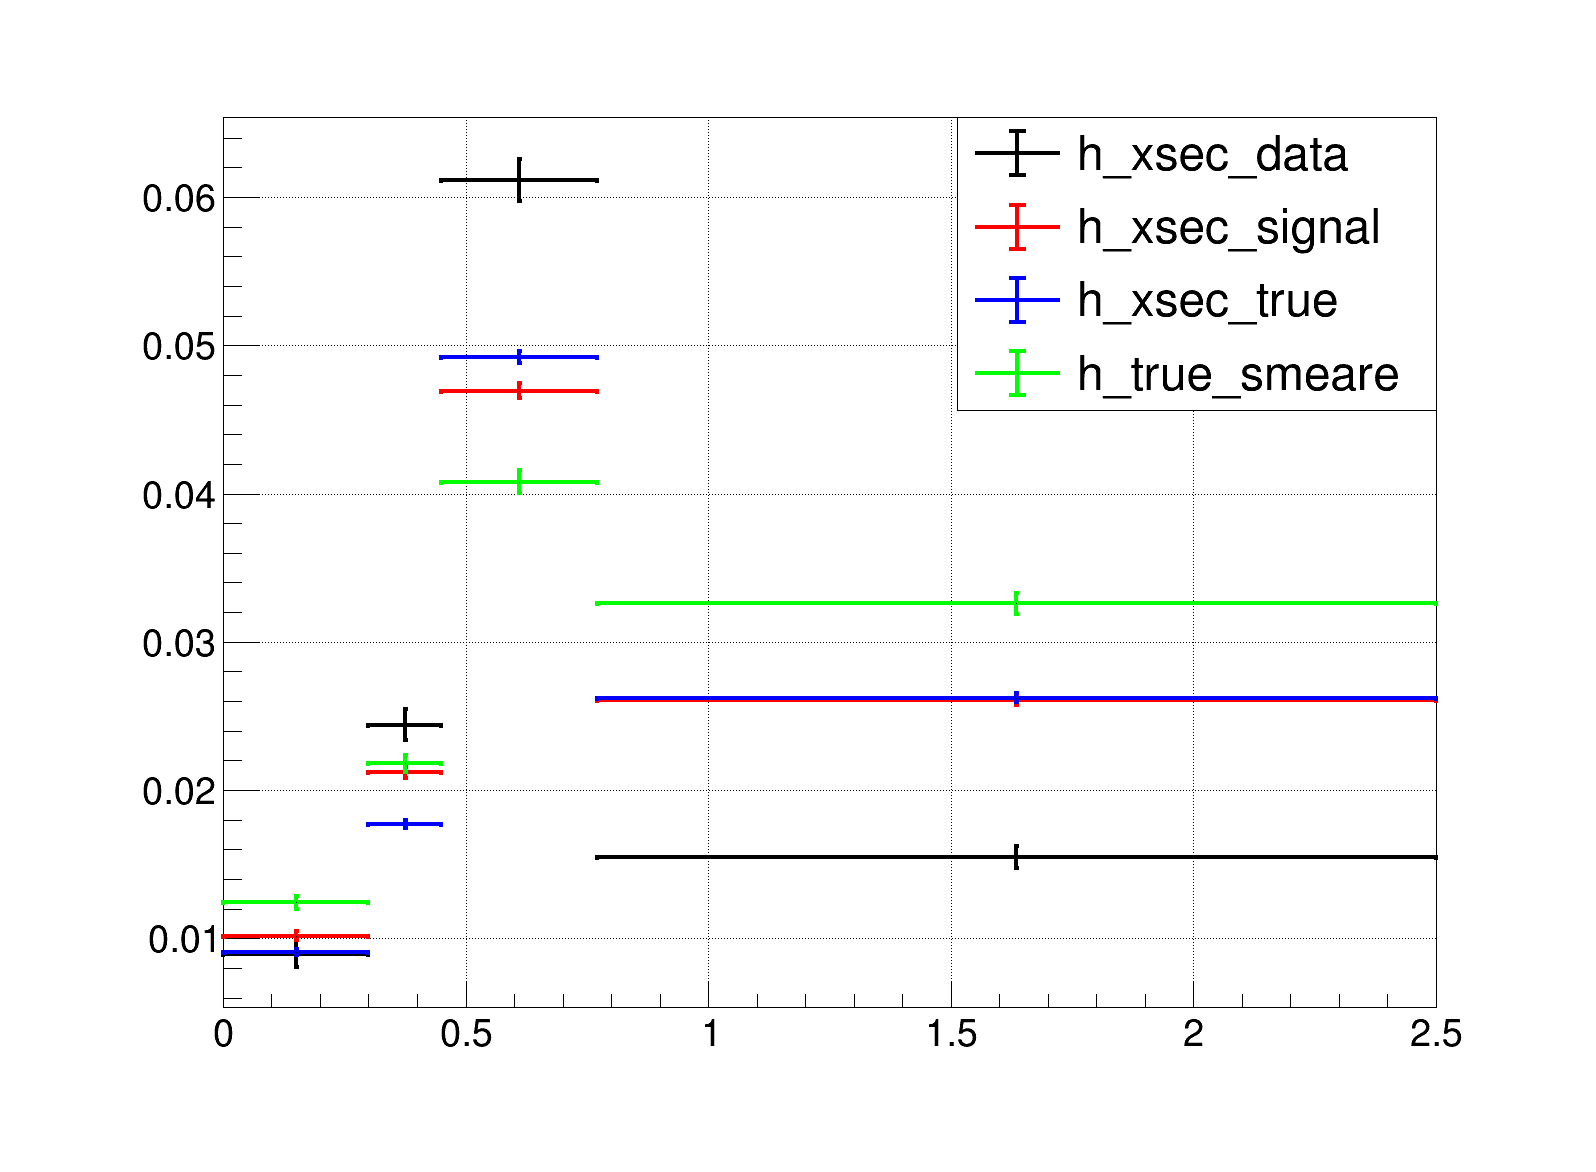

In [35]:
x_theta = 5
h_xsec_data[x_theta].Draw('e1')
h_xsec_data[x_theta].SetLineColor(ROOT.kBlack)
h_xsec_signal[x_theta].SetLineColor(ROOT.kRed)
h_xsec_true[x_theta].SetLineColor(ROOT.kBlue)
h_true_smeare[x_theta].SetLineColor(ROOT.kGreen)
h_xsec_signal[x_theta].Draw('same e1')
h_true_smeare[x_theta].SetLineWidth(4)
h_xsec_data[x_theta].SetLineWidth(4)
h_xsec_signal[x_theta].SetLineWidth(4)
h_xsec_true[x_theta].SetLineWidth(4)
h_true_smeare[x_theta].Draw('e1 same')
h_xsec_true[x_theta].Draw('e1 same')

legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
legend.AddEntry(h_xsec_data[x_theta],'h_xsec_data',"lep")
legend.AddEntry(h_xsec_signal[x_theta],'h_xsec_signal',"lep")
legend.AddEntry(h_xsec_true[x_theta],'h_xsec_true',"lep")
legend.AddEntry(h_true_smeare[x_theta],'h_true_smeare',"lep")
legend.Draw()
c1.Draw()

In [36]:
#dived by bin width (momentum as well as cos(theta))
for t_bin in range(len_theta):
    for m_bin in range(len_mom[t_bin]):
            h_xsec_data[t_bin].SetBinContent(m_bin+1,h_xsec_data[t_bin].GetBinContent(m_bin+1)/h_xsec_data[t_bin].GetBinWidth(m_bin+1))
            h_xsec_data[t_bin].SetBinError(m_bin+1,h_xsec_data[t_bin].GetBinError(m_bin+1)/h_xsec_data[t_bin].GetBinWidth(m_bin+1))
            
            h_xsec_signal[t_bin].SetBinContent(m_bin+1,h_xsec_signal[t_bin].GetBinContent(m_bin+1)/h_xsec_signal[t_bin].GetBinWidth(m_bin+1))
            h_xsec_signal[t_bin].SetBinError(m_bin+1,h_xsec_signal[t_bin].GetBinError(m_bin+1)/h_xsec_signal[t_bin].GetBinWidth(m_bin+1))
            
            h_xsec_true[t_bin].SetBinContent(m_bin+1,h_xsec_true[t_bin].GetBinContent(m_bin+1)/h_xsec_true[t_bin].GetBinWidth(m_bin+1))
            h_xsec_true[t_bin].SetBinError(m_bin+1,h_xsec_true[t_bin].GetBinError(m_bin+1)/h_xsec_true[t_bin].GetBinWidth(m_bin+1))
            
            h_true_smeare[t_bin].SetBinContent(m_bin+1,h_true_smeare[t_bin].GetBinContent(m_bin+1)/h_true_smeare[t_bin].GetBinWidth(m_bin+1))
            h_true_smeare[t_bin].SetBinError(m_bin+1,h_true_smeare[t_bin].GetBinError(m_bin+1)/h_true_smeare[t_bin].GetBinWidth(m_bin+1))
            
            h_xsec_true_noweight[t_bin].SetBinContent(m_bin+1,h_xsec_true_noweight[t_bin].GetBinContent(m_bin+1)/h_xsec_true_noweight[t_bin].GetBinWidth(m_bin+1))
            h_xsec_true_noweight[t_bin].SetBinError(m_bin+1,h_xsec_true_noweight[t_bin].GetBinError(m_bin+1)/h_xsec_true_noweight[t_bin].GetBinWidth(m_bin+1))
            
            h_true_noweight_smeare[t_bin].SetBinContent(m_bin+1,h_true_noweight_smeare[t_bin].GetBinContent(m_bin+1)/h_true_noweight_smeare[t_bin].GetBinWidth(m_bin+1))
            h_true_noweight_smeare[t_bin].SetBinError(m_bin+1,h_true_noweight_smeare[t_bin].GetBinError(m_bin+1)/h_true_noweight_smeare[t_bin].GetBinWidth(m_bin+1))
            
    bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
    h_xsec_data[t_bin].Scale(1.0/bin_width_theta)
    h_xsec_signal[t_bin].Scale(1.0/bin_width_theta)
    h_xsec_true[t_bin].Scale(1.0/bin_width_theta)
    h_true_smeare[t_bin].Scale(1.0/bin_width_theta)
    h_xsec_true_noweight[t_bin].Scale(1.0/bin_width_theta)
    h_true_noweight_smeare[t_bin].Scale(1.0/bin_width_theta)

In [37]:
for t_bin in range(len_theta):
    h_xsec_data[t_bin].Write('h_xsec_data['+str(t_bin)+']')
    h_xsec_signal[t_bin].Write('h_xsec_signal['+str(t_bin)+']')
    h_xsec_true[t_bin].Write('h_xsec_true['+str(t_bin)+']')
    h_true_smeare[t_bin].Write('h_xsec_true_smeare['+str(t_bin)+']')
    h_xsec_true_noweight[t_bin].Write('h_xsec_true_noweight['+str(t_bin)+']')
    h_true_noweight_smeare[t_bin].Write('h_true_noweight_smeare['+str(t_bin)+']')

xsec_data = ROOT.TH1F("xsec_data",'xsec_data',sum_bins,0,sum_bins)
xsec_signal = ROOT.TH1F("xsec_signal",'xsec_signal',sum_bins,0,sum_bins)
xsec_true = ROOT.TH1F("xsec_true",'xsec_true',sum_bins,0,sum_bins)
xsec_true_smear = ROOT.TH1F("xsec_true_smear",'xsec_true_smear',sum_bins,0,sum_bins)
xsec_true_noweight = ROOT.TH1F("xsec_true_noweight",'xsec_true_noweight',sum_bins,0,sum_bins)
xsec_true_noweight_smear = ROOT.TH1F("xsec_true_noweight_smear",'xsec_true_noweight_smear',sum_bins,0,sum_bins)

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        xsec_data.SetBinContent(bin_counter,h_xsec_data[t_bin].GetBinContent(m_bin+1))
        xsec_data.SetBinError(bin_counter,h_xsec_data[t_bin].GetBinError(m_bin+1))
        
        xsec_signal.SetBinContent(bin_counter,h_xsec_signal[t_bin].GetBinContent(m_bin+1))
        xsec_signal.SetBinError(bin_counter,h_xsec_signal[t_bin].GetBinError(m_bin+1))
        
        xsec_true.SetBinContent(bin_counter,h_xsec_true[t_bin].GetBinContent(m_bin+1))
        xsec_true.SetBinError(bin_counter,h_xsec_true[t_bin].GetBinError(m_bin+1))
        
        xsec_true_smear.SetBinContent(bin_counter,h_true_smeare[t_bin].GetBinContent(m_bin+1))
        xsec_true_smear.SetBinError(bin_counter,h_true_smeare[t_bin].GetBinError(m_bin+1))
        
        xsec_true_noweight.SetBinContent(bin_counter,h_xsec_true_noweight[t_bin].GetBinContent(m_bin+1))
        xsec_true_noweight.SetBinError(bin_counter,h_xsec_true_noweight[t_bin].GetBinError(m_bin+1))
        
        xsec_true_noweight_smear.SetBinContent(bin_counter,h_true_noweight_smeare[t_bin].GetBinContent(m_bin+1))
        xsec_true_noweight_smear.SetBinError(bin_counter,h_true_noweight_smeare[t_bin].GetBinError(m_bin+1))

xsec_data.Write('xsec_data')
xsec_signal.Write('xsec_signal')
xsec_true.Write('xsec_true')
xsec_true_smear.Write('xsec_true_smear')
xsec_true_noweight.Write('xsec_true_noweight')
xsec_true_noweight_smear.Write('xsec_true_noweight_smear')

826

In [38]:
h_QE = []
h_MEC = []
h_RES = []
h_DIS = []

h_temp = []

for t_bin in range(len_theta):
    h_QE.append( ROOT.TH1F('h_QE['+str(t_bin)+']',"h_QE",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_MEC.append( ROOT.TH1F('h_MEC['+str(t_bin)+']',"h_MEC",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_RES.append( ROOT.TH1F('h_RES['+str(t_bin)+']',"h_RES",len_mom[t_bin],array('f',mom_bins[t_bin])) )
    h_DIS.append( ROOT.TH1F('h_DIS['+str(t_bin)+']',"h_DIS",len_mom[t_bin],array('f',mom_bins[t_bin])) )

    h_temp.append( ROOT.TH1F('h_temp['+str(t_bin)+']','h_temp',len_mom[t_bin],array('f',mom_bins[t_bin])))
    
#bin_counter = 0
for t_bin in range(len_theta):
    this_cut = ' && cos(TrackTheta)>'+str(theta_bins[t_bin])+' && cos(TrackTheta)<'+str(theta_bins[t_bin+1])
    print this_cut
    globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_QE['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && MCNu_Interaction==0 && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && MCNu_Interaction==0 && !track_end_uncontained)','')
    h_QE[t_bin].Add(h_temp[t_bin])
    
    globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_MEC['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && MCNu_Interaction==10 && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && MCNu_Interaction==10 && !track_end_uncontained)','')
    h_MEC[t_bin].Add(h_temp[t_bin])
    
    globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_RES['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && MCNu_Interaction==1 && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && MCNu_Interaction==1 && !track_end_uncontained)','')
    h_RES[t_bin].Add(h_temp[t_bin])
    
    globale.overlay_out.Draw('TrackMomMCS_mom'+'>>h_DIS['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && MCNu_Interaction==2 && track_end_uncontained)','')
    globale.overlay_out.Draw('TrackMomRange_mu'+'>>h_temp['+str(t_bin)+']',weight_name+'*('+cut+this_cut+'&& numu_signal && MCNu_Interaction==2 && !track_end_uncontained)','')
    h_DIS[t_bin].Add(h_temp[t_bin])
    
    list_histo = [h_QE[t_bin],h_MEC[t_bin],h_RES[t_bin],h_DIS[t_bin]]
    
    for x in list_histo:
        x.Scale(globale.scale[globale.overlay])
        x.Divide(h_1d_eff_tilde[t_bin])
        x.Scale(1.0/(N_tot*beam_flux*1e-38))
        x.SetLineWidth(4)
        for i in range(1,len_mom[t_bin]+1):
            x.SetBinContent(i,x.GetBinContent(i)/x.GetBinWidth(i))
            x.SetBinError(i,x.GetBinError(i)/x.GetBinWidth(i))
            
    bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
    h_QE[t_bin].Scale(1.0/bin_width_theta)
    h_MEC[t_bin].Scale(1.0/bin_width_theta)
    h_RES[t_bin].Scale(1.0/bin_width_theta)
    h_DIS[t_bin].Scale(1.0/bin_width_theta)

    h_QE[t_bin].SetLineColor(ROOT.kGreen+2)
    h_MEC[t_bin].SetLineColor(ROOT.kOrange-3)
    h_RES[t_bin].SetLineColor(ROOT.kRed+1)
    h_DIS[t_bin].SetLineColor(ROOT.kBlue+1)

    h_QE[t_bin].Write('h_QE['+str(t_bin)+']')
    h_MEC[t_bin].Write('h_MEC['+str(t_bin)+']')
    h_RES[t_bin].Write('h_RES['+str(t_bin)+']')
    h_DIS[t_bin].Write('h_DIS['+str(t_bin)+']')



 && cos(TrackTheta)>-1.0 && cos(TrackTheta)<-0.5
 && cos(TrackTheta)>-0.5 && cos(TrackTheta)<0.0
 && cos(TrackTheta)>0.0 && cos(TrackTheta)<0.28
 && cos(TrackTheta)>0.28 && cos(TrackTheta)<0.47
 && cos(TrackTheta)>0.47 && cos(TrackTheta)<0.63
 && cos(TrackTheta)>0.63 && cos(TrackTheta)<0.765
 && cos(TrackTheta)>0.765 && cos(TrackTheta)<0.865
 && cos(TrackTheta)>0.865 && cos(TrackTheta)<0.935
 && cos(TrackTheta)>0.935 && cos(TrackTheta)<1.0


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/png/h_xsec_2D_0.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/pdf/h_xsec_2D_0.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/png/h_xsec_2D_1.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/pdf/h_xsec_2D_1.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/png/h_xsec_2D_2.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/pdf/h_xsec_2D_2.pdf has been create

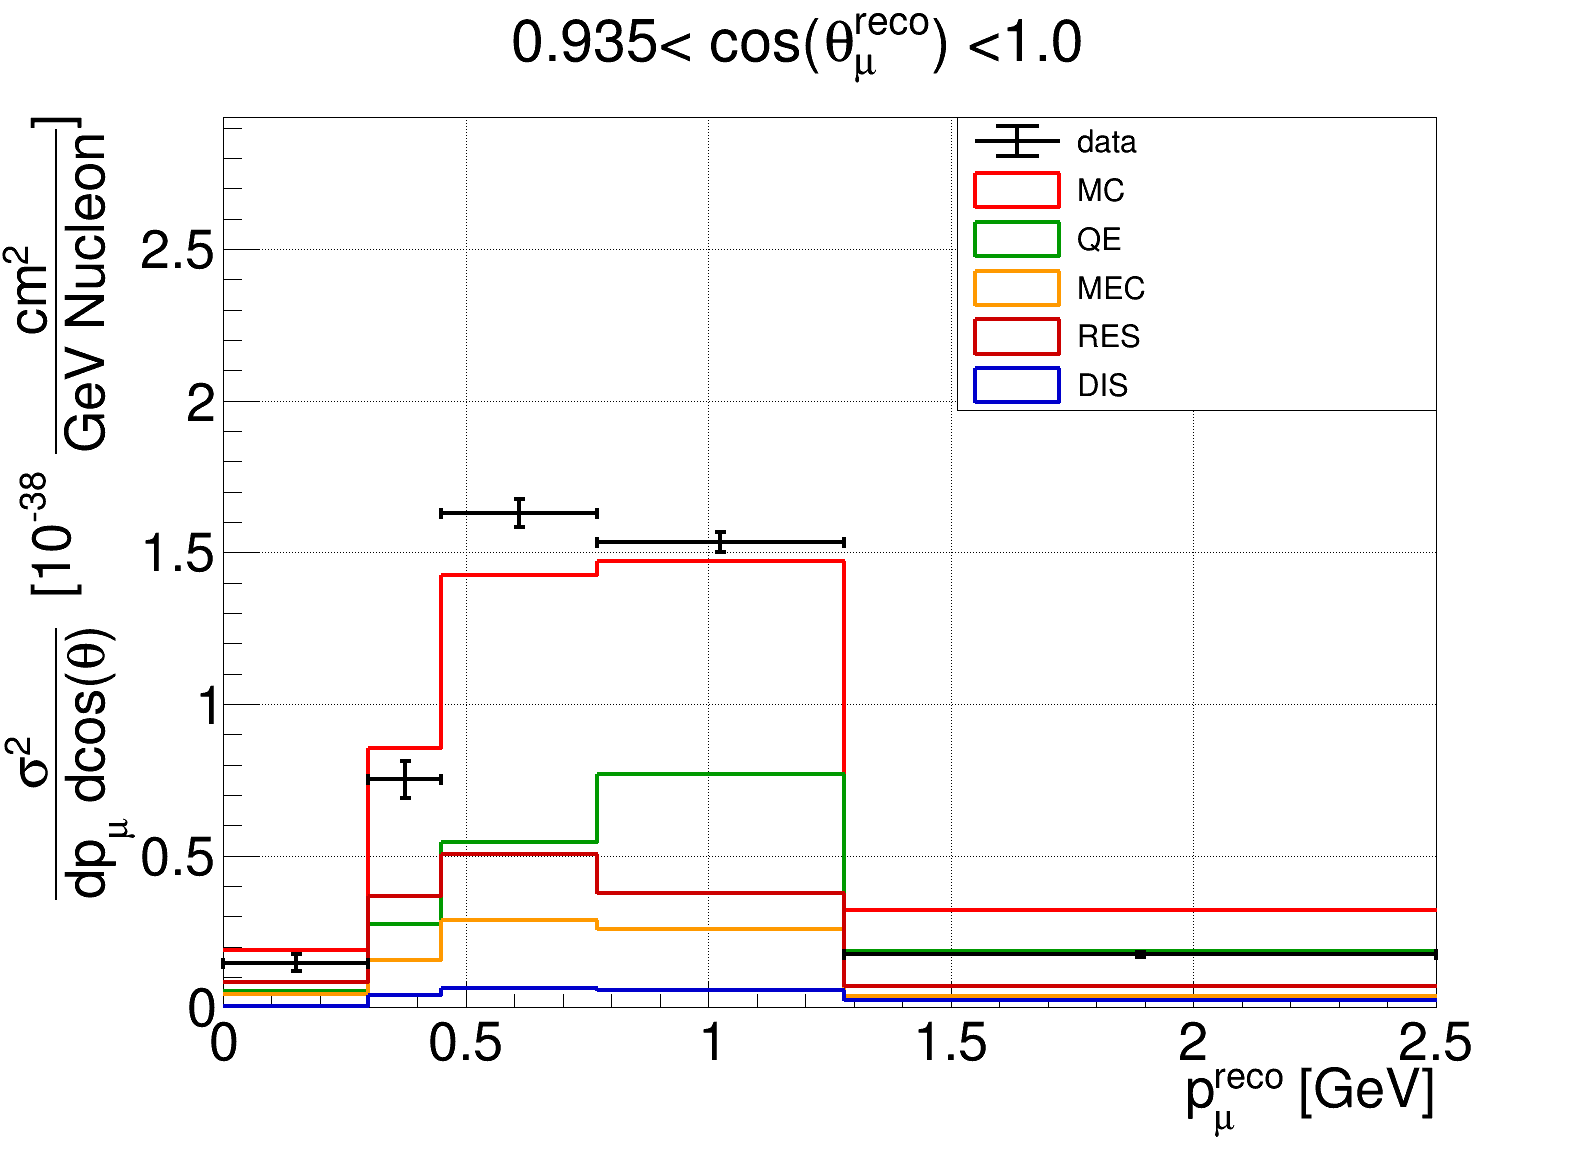

In [39]:
ROOT.gStyle.SetOptTitle(1)

for x_theta in range(len_theta): 
    h_xsec_data[x_theta].SetTitle(str(theta_bins[x_theta])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[x_theta+1]))
    h_xsec_data[x_theta].SetXTitle("p^{reco}_{#mu} [GeV]")
    h_xsec_data[x_theta].SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    h_xsec_data[x_theta].GetYaxis().SetTitleSize(0.05)
    h_xsec_data[x_theta].GetYaxis().SetTitleOffset(0.0)
    h_xsec_data[x_theta].GetYaxis().SetLabelSize(0.05)
    h_xsec_data[x_theta].GetXaxis().SetTitleSize(0.05)
    h_xsec_data[x_theta].GetXaxis().SetLabelSize(0.05)
    h_xsec_data[x_theta].GetXaxis().SetTitleOffset(1)

    h_xsec_data[x_theta].SetLineColor(1)
    h_xsec_data[x_theta].SetLineWidth(4)
    h_xsec_data[x_theta].Draw('E1')

    #h_true_smeare[x_theta].SetLineColor(3)
    #h_true_smeare[x_theta].SetLineWidth(4)
    #h_true_smeare[x_theta].Draw('same hist')

    h_xsec_signal[x_theta].SetLineColor(2)
    h_xsec_signal[x_theta].SetLineWidth(4)
    h_xsec_signal[x_theta].Draw('same hist')
    
    h_QE[x_theta].Draw('same hist')
    h_MEC[x_theta].Draw('same hist')
    h_RES[x_theta].Draw('same hist')
    h_DIS[x_theta].Draw('same hist')
    
    h_xsec_data[x_theta].SetMaximum(-1111)
    h_xsec_data[x_theta].SetMaximum(h_xsec_data[x_theta].GetMaximum()*1.8)
    ROOT.gStyle.SetEndErrorSize(5)
    h_xsec_data[x_theta].Draw('E1 same')

    legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
    legend.AddEntry(h_xsec_data[x_theta],'data',"lep");
    #legend.AddEntry(h_true_smeare[x_theta],'smeared true',"f");
    legend.AddEntry(h_xsec_signal[x_theta],'MC',"f");
    legend.AddEntry(h_QE[x_theta],'QE',"f");
    legend.AddEntry(h_MEC[x_theta],'MEC',"f");
    legend.AddEntry(h_RES[x_theta],'RES',"f");
    legend.AddEntry(h_DIS[x_theta],'DIS',"f");
    legend.Draw()
    c1.Draw()
    c1.SaveAs(globale.outputdir_png + 'h_xsec_2D_'+str(x_theta)+'.png')
    #c1.SaveAs(globale.outputdir_root + 'h_xsec_2D_'+str(x_theta)+'.root')
    c1.SaveAs(globale.outputdir_pdf + 'h_xsec_2D_'+str(x_theta)+'.pdf')

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/png/h_xsec_2D_0_channel.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/pdf/h_xsec_2D_0_channel.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/png/h_xsec_2D_1_channel.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/pdf/h_xsec_2D_1_channel.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_MCC8_/png/h_xsec_2D_2_channel.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_2D_weighted_Run3_M

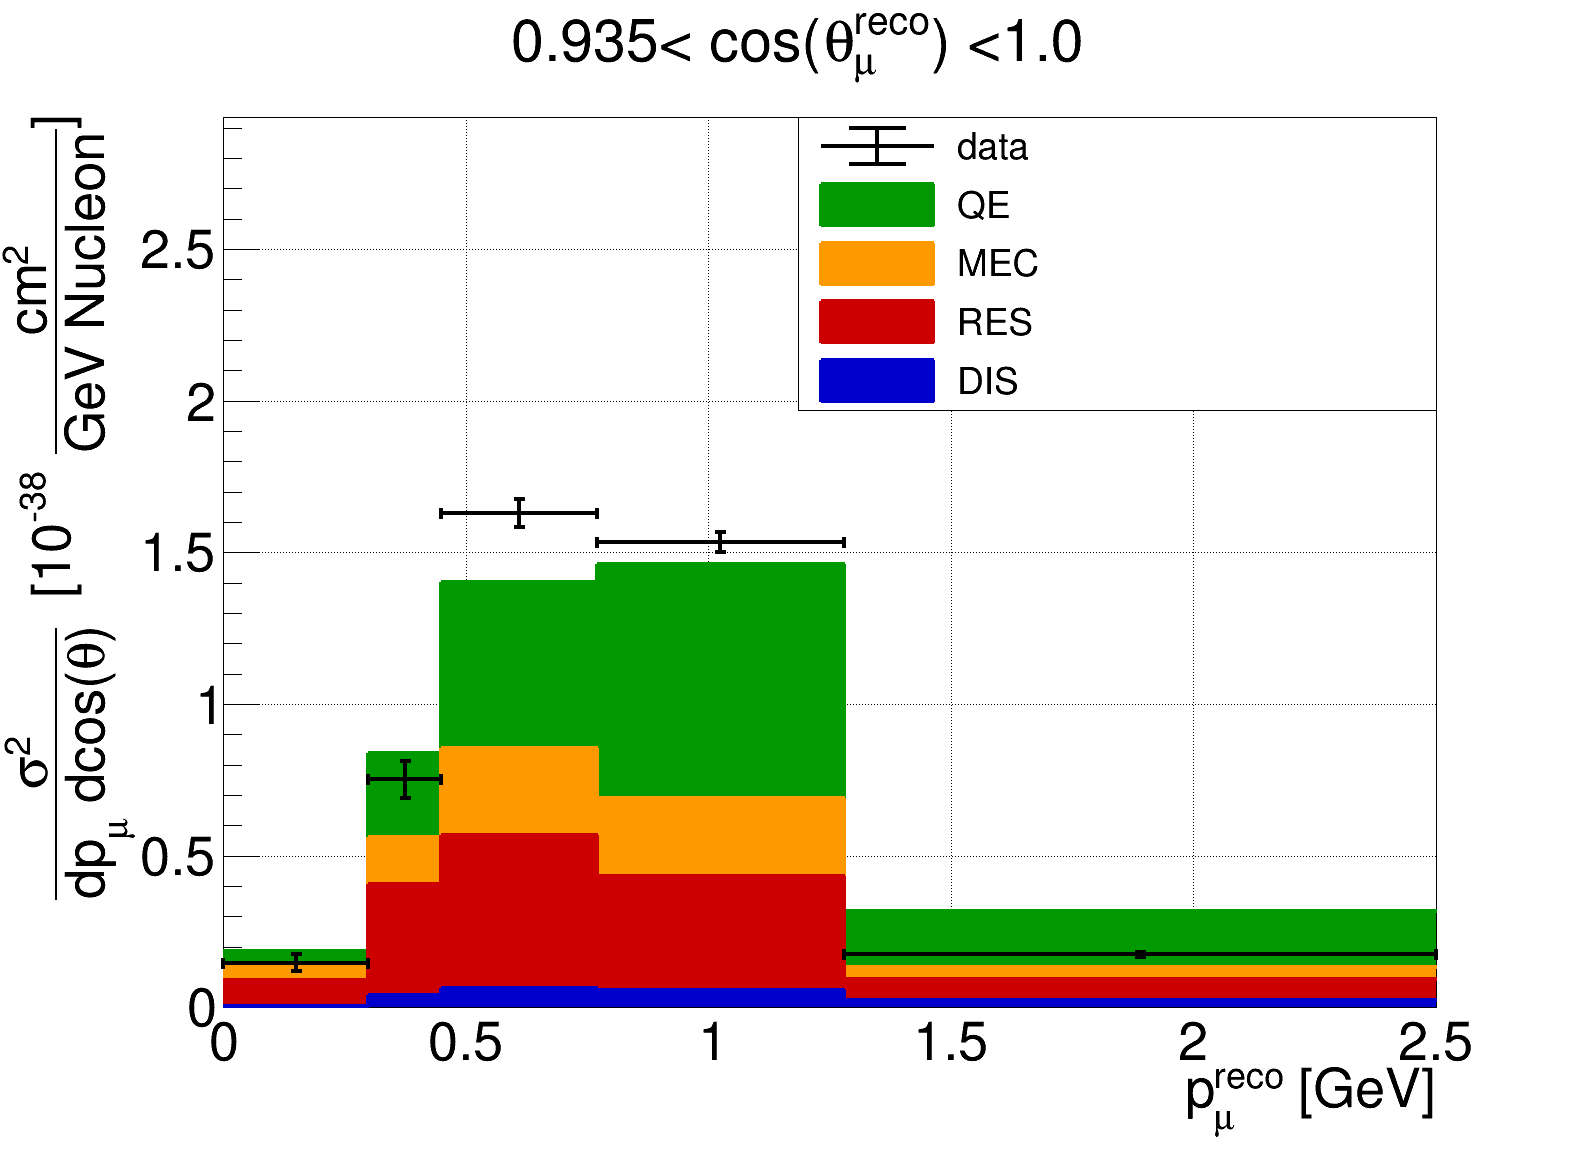

In [40]:
ROOT.gStyle.SetOptTitle(1)

for x_theta in range(len_theta): 
    h_xsec_data[x_theta].SetTitle(str(theta_bins[x_theta])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[x_theta+1]))
    h_xsec_data[x_theta].SetXTitle("p^{reco}_{#mu} [GeV]")
    h_xsec_data[x_theta].SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    h_xsec_data[x_theta].GetYaxis().SetTitleSize(0.05)
    h_xsec_data[x_theta].GetYaxis().SetTitleOffset(0.0)
    h_xsec_data[x_theta].GetYaxis().SetLabelSize(0.05)
    h_xsec_data[x_theta].GetXaxis().SetTitleSize(0.05)
    h_xsec_data[x_theta].GetXaxis().SetLabelSize(0.05)
    h_xsec_data[x_theta].GetXaxis().SetTitleOffset(1)

    h_xsec_data[x_theta].SetLineColor(1)
    h_xsec_data[x_theta].SetLineWidth(4)
    h_xsec_data[x_theta].Draw('E1')

    #h_true_smeare[x_theta].SetLineColor(3)
    #h_true_smeare[x_theta].SetLineWidth(4)
    #h_true_smeare[x_theta].Draw('same hist')

    h_xsec_signal[x_theta].SetLineColor(2)
    h_xsec_signal[x_theta].SetLineWidth(4)
    #h_xsec_signal[x_theta].Draw('same hist')
    
    hs = ROOT.THStack("hs",'variable'+';'+'axis_name'+'; Entries per bin');
    h_DIS[x_theta].SetFillColor(ROOT.kBlue+1)
    h_RES[x_theta].SetFillColor(ROOT.kRed+1)
    h_MEC[x_theta].SetFillColor(ROOT.kOrange-3)
    h_QE[x_theta].SetFillColor(ROOT.kGreen+2)
    hs.Add(h_DIS[x_theta])
    hs.Add(h_RES[x_theta])
    hs.Add(h_MEC[x_theta])
    hs.Add(h_QE[x_theta])
    #h_QE[x_theta].Draw('same hist')
    #h_MEC[x_theta].Draw('same hist')
    #h_RES[x_theta].Draw('same hist')
    #h_DIS[x_theta].Draw('same hist')
    hs.Draw('hist same')

    
    h_xsec_data[x_theta].SetMaximum(-1111)
    h_xsec_data[x_theta].SetMaximum(h_xsec_data[x_theta].GetMaximum()*1.8)
    ROOT.gStyle.SetEndErrorSize(5)
    h_xsec_data[x_theta].Draw('E1 same')

    legend = ROOT.TLegend(0.5,0.65,0.9,0.9)
    legend.AddEntry(h_xsec_data[x_theta],'data',"lep");
    #legend.AddEntry(h_true_smeare[x_theta],'smeared true',"f");
    #legend.AddEntry(h_xsec_signal[x_theta],'MC',"f");
    legend.AddEntry(h_QE[x_theta],'QE',"f");
    legend.AddEntry(h_MEC[x_theta],'MEC',"f");
    legend.AddEntry(h_RES[x_theta],'RES',"f");
    legend.AddEntry(h_DIS[x_theta],'DIS',"f");
    legend.Draw()
    
    #prelim, pot_tex = draw_adding()
    #prelim.Draw()
    #pot_tex.Draw()

    c1.Draw()
    c1.SaveAs(globale.outputdir_png + 'h_xsec_2D_'+str(x_theta)+'_channel.png')
    #c1.SaveAs(globale.outputdir_root + 'h_xsec_2D_'+str(x_theta)+'_channel.root')
    c1.SaveAs(globale.outputdir_pdf + 'h_xsec_2D_'+str(x_theta)+'_channel.pdf')

In [41]:
RootFile.Close()